In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

(-0.5, 2463.5, 811.5, -0.5)

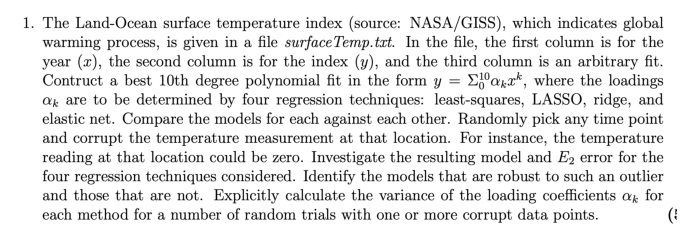

In [2]:
A = imread('1.png')
plt.imshow(A)
plt.axis('off')

In [27]:
import pandas as pd

def import_excel_columns(file_path):
    try:
        # Load the Excel file into a DataFrame
        df = pd.read_excel(file_path)

        
        column1_array = df['Column1'].tolist()
        column2_array = df['Column2'].tolist()
        column3_array = df['Column3'].tolist()

        return column1_array, column2_array, column3_array


    except Exception as e:
        print(f"Error: {e}")
        return None, None, None

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = 'surfaceTemp.xlsx'
column1, column2, column3 = import_excel_columns(file_path)

if column1 is not None and column2 is not None and column3 is not None:
    print("Column 1:", column1)
    print("Column 2:", column2)
    print("Column 3:", column3)
else:
    print("Failed to import Excel file.")


Column 1: [1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Column 2: [-0.17, -0.09, -0.11, -0.18, -0.29, -0.34, -0.32, -0.37, -0.18, -0.11, -0.36, -0.23, -0.28, -0.32, -0.32, -0.24, -0.11, -

In [35]:
x=np.array(column1)
y=np.array(column2)
fit = np.array(column3)

In [36]:
x = np.arange(1, 144)
print(np.shape(x))

(143,)


In [14]:
#importing libraries for regression techniques
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero


In [15]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
regressors = {
    "Least Squares": LinearRegression(),
    "LASSO": Lasso(alpha=0.01),  
    "Ridge": Ridge(alpha=1.0),   
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5) 
}

In [16]:
results = {}
for name, model in regressors.items():
    model.fit(poly_features, y)
    predicted_values = model.predict(poly_features)
    mse = mean_squared_error(y, predicted_values)
    results[name] = (model, mse)

/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.085e-01, tolerance: 1.924e-03
  model = cd_fast.enet_coordinate_descent(
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.13486e-44): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.059e-01, toler

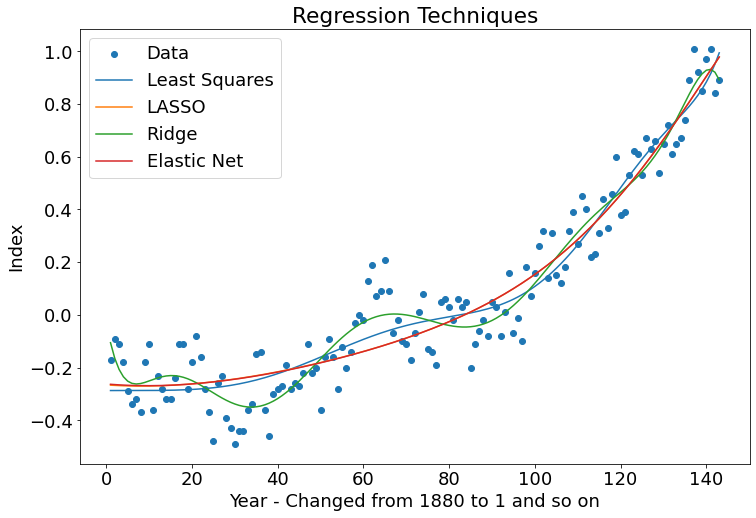

In [18]:
plt.scatter(x, y, label="Data")
for name, (model, _) in results.items():
    plt.plot(x, model.predict(poly_features), label=name)
plt.legend()
plt.title("Regression Techniques")
plt.xlabel("Year - Changed from 1880 to 1 and so on")
plt.ylabel("Index")
plt.show()

## Comparing models 

In [20]:
for name, (_, mse) in results.items():
    print(f"{name} MSE: {mse}")

Least Squares MSE: 0.011659155280896899
LASSO MSE: 0.012683112475043855
Ridge MSE: 0.008804036198834036
Elastic Net MSE: 0.012655022373223773


Mean squared error of Ridge Regression is the least. Whereas, highest for lasso

## Introducing Outlier

In [37]:
outlier_index = np.random.choice(143)
y[outlier_index] = 10

In [38]:
results = {}
for name, model in regressors.items():
    model.fit(poly_features, y)
    predicted_values = model.predict(poly_features)
    mse = mean_squared_error(y, predicted_values)
    results[name] = (model, mse)

/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.150e+01, tolerance: 1.173e-02
  model = cd_fast.enet_coordinate_descent(
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.13486e-44): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.150e+01, toler

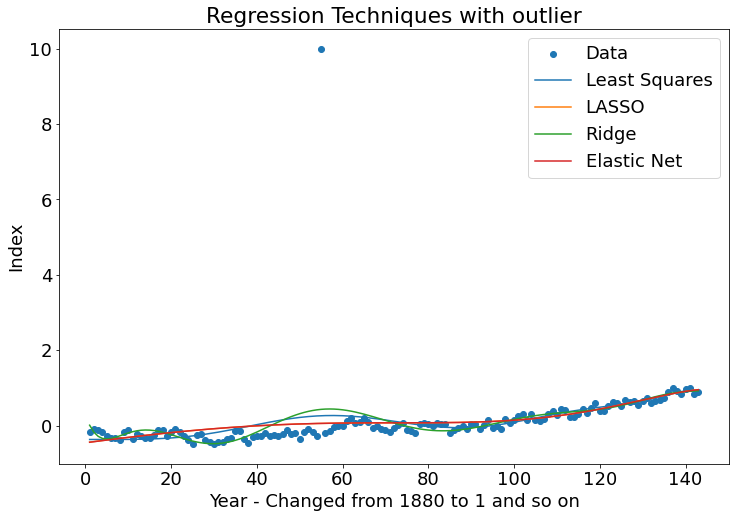

In [39]:
plt.scatter(x, y, label="Data")
for name, (model, _) in results.items():
    plt.plot(x, model.predict(poly_features), label=name)
plt.legend()
plt.title("Regression Techniques with outlier")
plt.xlabel("Year - Changed from 1880 to 1 and so on")
plt.ylabel("Index")
plt.show()

In [40]:
for name, (_, mse) in results.items():
    print(f"{name} MSE: {mse}")

Least Squares MSE: 0.7013090098558272
LASSO MSE: 0.7200142443123421
Ridge MSE: 0.6829267372984303
Elastic Net MSE: 0.7200771152777505


The E2 errors rised up significantly because of the corruption of a randomly selected data point. Whereas Ridge looks to have least error inspite of the large magnitude outlier (10). 

## Finding the variance with existing data

In [55]:

num_trials = 10
variances = {name: [] for name in regressors}

for _ in range(num_trials):
    # Generate synthetic data for x and introduce outliers in different trials
    
    y = np.array(column2)
    
    # Introduce outliers in different trials
    outlier_index = np.random.choice(143)
    y[outlier_index] = 10

    for name, model in regressors.items():
        model.fit(poly_features, y)
        variances[name].append(np.var(model.coef_))

# Calculate the average variance across trials for each method
average_variances = {name: np.mean(variance_list) for name, variance_list in variances.items()}

# Print or use the average_variances as needed
for name, avg_variance in average_variances.items():
    print(f"Method: {name}, Average Variance: {avg_variance}")


Method: Least Squares, Average Variance: 3.2209798673529645e-17
Method: LASSO, Average Variance: 1.4037835828084887e-05
Method: Ridge, Average Variance: 0.012900349214813759
Method: Elastic Net, Average Variance: 1.448842525571179e-05


/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.070e+01, tolerance: 1.173e-02
  model = cd_fast.enet_coordinate_descent(
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.13486e-44): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.070e+01, toler

Observing Variance for different models gives us a clear insight about the model robustness. Here, Ridge shows lowest value meaning its robustness to outliers in the model.  